In [2]:
import matplotlib.pyplot as plt
import numpy as np
import midii
import copy
from pathlib import Path

In [3]:
mid = midii.MidiFile(
    midii.sample.dataset[0], convert_1_to_0=True, lyric_encoding="cp949"
)
Path(mid.filename).name

'ba_05688_-4_a_s02_m_02.mid'

In [4]:
def calculate_absolute_times(delta_times):
    """Calculates absolute times from delta times."""
    return np.cumsum(np.array(delta_times, dtype=np.int64))

In [5]:
# --- Generate Data for Plotting ---
original_abs_times = calculate_absolute_times(mid.times)

mid2 = copy.deepcopy(mid)
mid2.quantize(error_forwarding=False)
quantized_abs_times_naive = calculate_absolute_times(mid2.times)

mid.quantize()
quantized_abs_times_with_EF = calculate_absolute_times(mid.times)

# Calculate drift (deviation from original absolute time)
drift_naive = quantized_abs_times_naive - original_abs_times
drift_with_EF = quantized_abs_times_with_EF - original_abs_times

# Use event index as x-axis for simplicity
event_index = np.arange(len(mid.times))

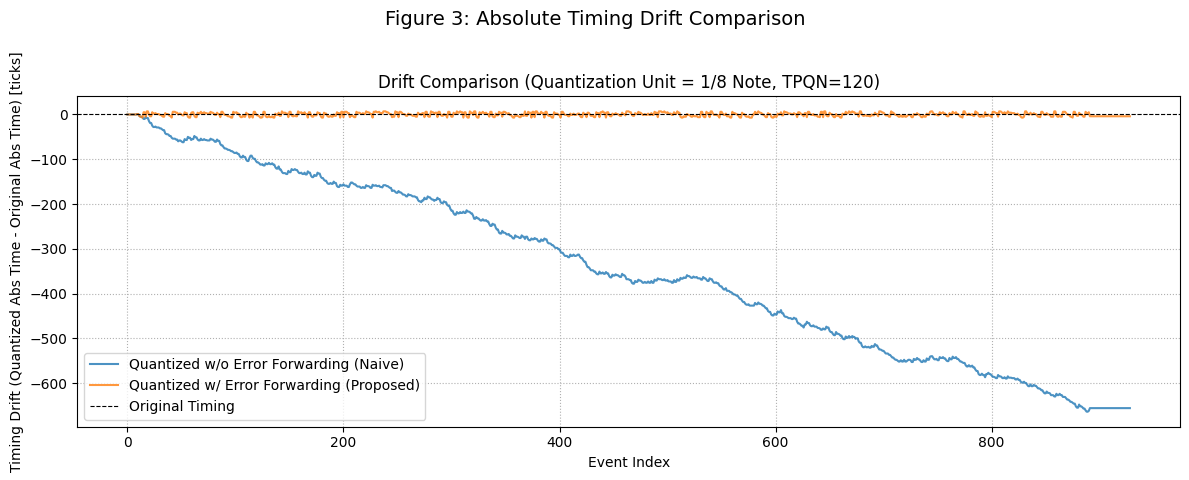

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Figure 3: Absolute Timing Drift Comparison', fontsize=14)

ax.plot(event_index, drift_naive, label='Quantized w/o Error Forwarding (Naive)', alpha=0.8, linewidth=1.5)
ax.plot(event_index, drift_with_EF, label='Quantized w/ Error Forwarding (Proposed)', alpha=0.8, linewidth=1.5)

ax.axhline(0, color='black', linestyle='--', linewidth=0.8, label='Original Timing')
ax.set_xlabel("Event Index")
ax.set_ylabel("Timing Drift (Quantized Abs Time - Original Abs Time) [ticks]")
ax.set_title(f"Drift Comparison (Quantization Unit = 1/{int(1/0.125)} Note, TPQN={mid.ticks_per_beat})")
ax.grid(True, linestyle=':')
ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Use plt.savefig('figure3_drift_comparison.png', dpi=300) for paper